# **MILESTONE 1**

In [ ]:
#Imported pandas and numpy
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1. Used the PRS dataset to create a dataframe
df = pd.read_csv('./drive/MyDrive/Final.csv')

In [ ]:
#2. Checking the description of the dataframe
print(df.describe())

       CUSTOMER_ORDER_ID     SALES_ORG  COMPANY_CODE  ORDER_CREATION_DATE  \
count       1.101925e+06  1.101925e+06  1.101925e+06         1.101925e+06   
mean        8.763187e+08  3.304891e+03  3.431364e+03         2.022032e+07   
std         7.088594e+07  6.958920e+02  5.483805e+02         1.426756e+02   
min         7.534520e+08  2.100000e+03  5.900000e+01         2.022010e+07   
25%         8.149522e+08  2.702000e+03  3.260000e+03         2.022021e+07   
50%         8.763963e+08  3.305000e+03  3.660000e+03         2.022032e+07   
75%         9.376832e+08  3.908000e+03  3.670000e+03         2.022042e+07   
max         9.990063e+08  4.510000e+03  4.260000e+03         2.022060e+07   

       ORDER_CREATION_TIME  SOLD_TO_PARTY  REQUESTED_DELIVERY_DATE  \
count         1.101925e+06   1.101925e+06             1.101925e+06   
mean          1.340316e+05   8.763265e+08             2.022035e+07   
std           6.503618e+04   7.090306e+07             1.751912e+03   
min           0.000000e+00

In [ ]:
#3. Checking the shape of the dataframe
print(df.shape)

(1101925, 16)


In [ ]:
#4. Checking the data frame informations
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [ ]:
#5. Checking for the Null values in the dataframe to replace it later with "NaN"
print(df.isnull().sum())

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


In [ ]:
#6. Replacing all the null values with "NaN" and then checking the dataframe again so that we are sure that there are no Null values in it
df.fillna("NaN", inplace=True)
print(df.isnull().sum())

CUSTOMER_ORDER_ID          0
SALES_ORG                  0
DISTRIBUTION_CHANNEL       0
DIVISION                   0
RELEASED_CREDIT_VALUE      0
PURCHASE_ORDER_TYPE        0
COMPANY_CODE               0
ORDER_CREATION_DATE        0
ORDER_CREATION_TIME        0
CREDIT_CONTROL_AREA        0
SOLD_TO_PARTY              0
ORDER_AMOUNT               0
REQUESTED_DELIVERY_DATE    0
ORDER_CURRENCY             0
CREDIT_STATUS              0
CUSTOMER_NUMBER            0
dtype: int64


In [ ]:
#7. Changing the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"
df["ORDER_CREATION_DATE"] = pd.to_datetime(df["ORDER_CREATION_DATE"], format="%Y%m%d")

In [ ]:
#8. Repeating the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"
df["REQUESTED_DELIVERY_DATE"] = pd.to_datetime(df["REQUESTED_DELIVERY_DATE"], format="%Y%m%d")

In [ ]:
#9. Sanity check - Checking how many records are having order date greater than the delivery date
print(df[df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"]].shape[0])

27142


In [ ]:
#10. Removing those records where order date is greater than the delivery date and then checking again to make sure all the order dates are smaller than the delivery dates
df = df[df["ORDER_CREATION_DATE"] <= df["REQUESTED_DELIVERY_DATE"]]
print(df[df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"]].shape[0])

0


In [ ]:
#11. Checking the number of records where the “ORDER_AMOUNT” field is having “-” in it.
print(df[df["ORDER_AMOUNT"].str.contains("-")].shape[0])

32


In [ ]:
#12. Replacing “-” with “” from the “ORDER_AMOUNT” field.
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace("-", "")
print(df[df["ORDER_AMOUNT"].str.contains("-")].shape[0])

0


In [ ]:
#13. Checking the number of records where the “ORDER_AMOUNT” field is having “,” in it.
print(df[df["ORDER_AMOUNT"].str.contains(",")].shape[0])

1073406


In [ ]:
#14. Replacing “,” with “.” from the “ORDER_AMOUNT” field and then checking the number of records where the “ORDER_AMOUNT” field is having “,” in it to make sure there is none.
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace(",", ".")
print(df[df["ORDER_AMOUNT"].str.contains(",")].shape[0])

0


In [ ]:
#15. Counting the number of records where the order date and the delivery date are same.
print(df[df["ORDER_CREATION_DATE"] == df["REQUESTED_DELIVERY_DATE"]].shape[0])

100437


In [ ]:
#16. Counting the number of records for each currency type by using the field “'ORDER_CURRENCY'”
print(df["ORDER_CURRENCY"].value_counts())

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


In [ ]:
#17. Creating a new column in the existing dataframe as “'amount_in_usd'” and converting all the non-USD currencies in USD and storing them in the same column.
#To achieve this, first we make dictionary with all the conversion rates converting currencies to USD for all currencies that we displayed in the previous step.
conversion_rates = {"USD" : 1.00 , "EUR": 1.08 , "HKD" : 0.13 , "CHF" : 1.10 , "GBP" : 1.23 , "AUD" : 0.66 , "CAD" : 0.74 , "MYR" : 0.23 , "PLN" : 0.24 , "AED" : 0.26 , "RON" : 0.22 , "SGD" : 0.73 , "CZK" : 0.04 , "HU1" : 0.003 , "NZD" : 0.62 , "BHD" : 2.65 , "SAR" : 0.26 , "QAR" : 0.27 , "KWD" : 3.23 , "SEK" :0.09}
#Next we used a lambda function to get the convertion rates for the each row's respective currency from our dictionary and and using it for the conversion to USD. We kept axis=1 because we want to perform the operations row wise (for entries into a column)
df["amount_in_usd"] = df.apply(lambda row: float(row["ORDER_AMOUNT"]) * conversion_rates.get(row["ORDER_CURRENCY"], 1), axis=1)

In [ ]:
#18. Checking for values “0” in the “'amount_in_usd” column.
print(df[df["amount_in_usd"] == 0].shape[1])

17


In [ ]:
#19. Creating a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE' and then checking the dataframe if the new column was added or not
df["unique_cust_id"] = df["CUSTOMER_NUMBER"].astype(str) + df["COMPANY_CODE"].astype(str)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3223.0887,12103318044260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000,12103318044260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260


# **MILESTONE 2**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

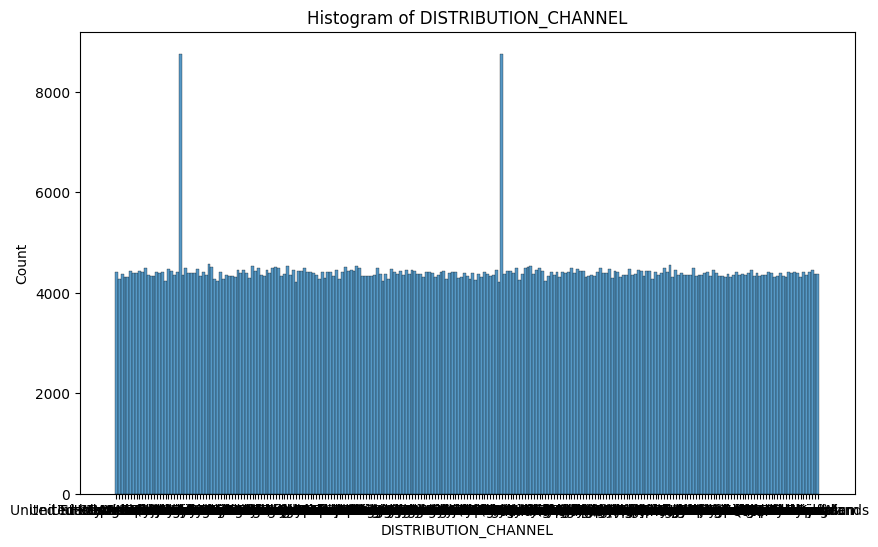

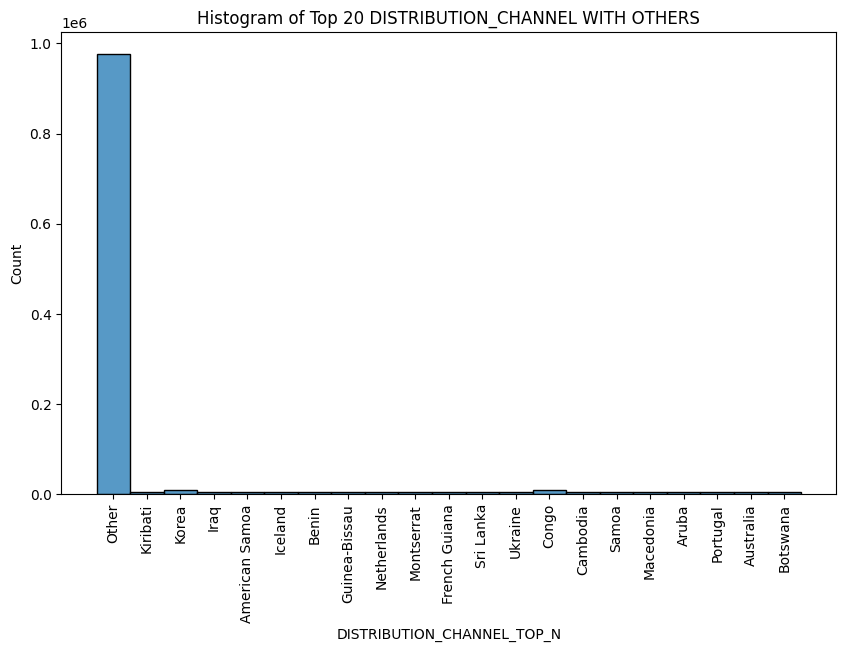

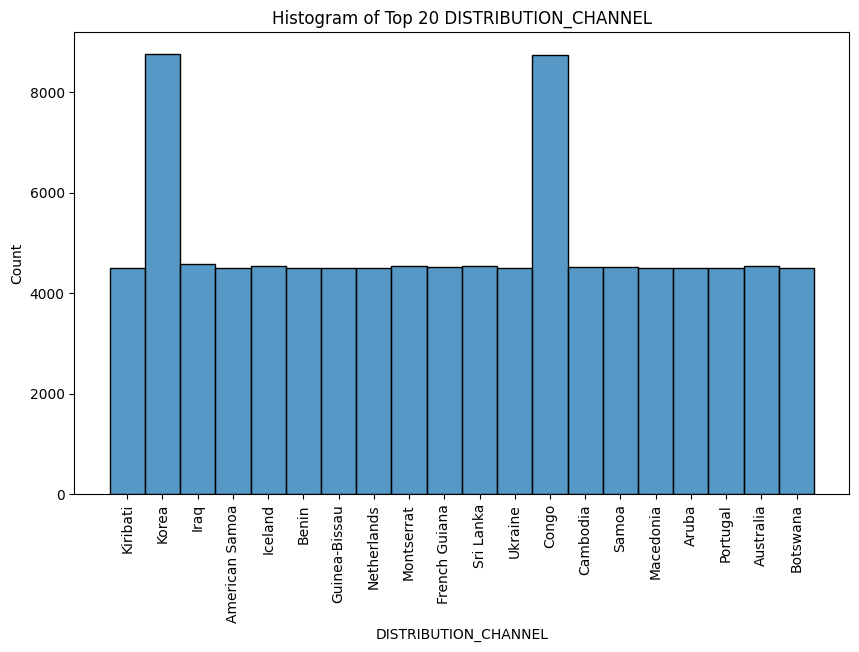

In [ ]:
# 1. Create a Histogram on DISTRIBUTION_CHANNEL

plt.figure(figsize=(10,6))
sns.histplot(df['DISTRIBUTION_CHANNEL'])
plt.title('Histogram of DISTRIBUTION_CHANNEL')
plt.show()

# The histogram plot appears cluttered because there are more than 243 different distribution channels, making it challenging to display them neatly in a single plot.
# To address this, we can focus on the top 20 distribution channels and group the remaining ones under an "Others" category.

# Define the number of top categories to display
N = 20

# Create a new column "DISTRIBUTION_CHANNEL_TOP_N" that contains the top N categories and groups the rest into "Other"
df['DISTRIBUTION_CHANNEL_TOP_N'] = df['DISTRIBUTION_CHANNEL'].where(df['DISTRIBUTION_CHANNEL'].isin(df['DISTRIBUTION_CHANNEL'].value_counts().index[:N]), 'Other')

# Create a histogram on the new column
plt.figure(figsize=(10,6))
sns.histplot(df['DISTRIBUTION_CHANNEL_TOP_N'])
plt.title('Histogram of Top ' + str(N) + ' DISTRIBUTION_CHANNEL WITH OTHERS')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#To create a more balanced and visually appealing histogram plot, we will exclude the "Others" category and only focus on the top 20 distribution channels.
#This approach avoids the imbalance caused by the combined sum value of the "Others" category, resulting in a more informative and visually balanced plot.

# Create a new dataframe that contains only the top N categories
df_top_n = df[df['DISTRIBUTION_CHANNEL'].isin(df['DISTRIBUTION_CHANNEL'].value_counts().index[:N])]

# Create a histogram on the new dataframe
plt.figure(figsize=(10,6))
sns.histplot(df_top_n['DISTRIBUTION_CHANNEL'])
plt.title('Histogram of Top ' + str(N) + ' DISTRIBUTION_CHANNEL')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

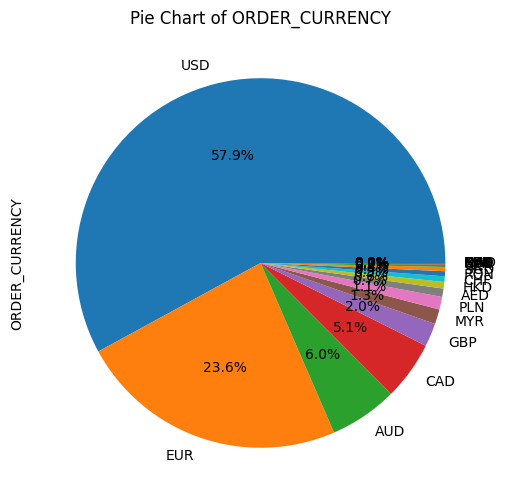

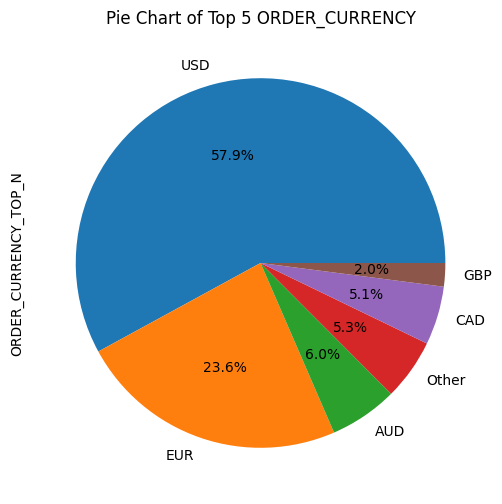

In [ ]:
# 2. Create a Pie Chart on ORDER_CURRENCY
plt.figure(figsize=(10,6))
df['ORDER_CURRENCY'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of ORDER_CURRENCY')
plt.show()

# Due to the clutter caused by including all currencies in the original pie plot, we will create a new pie plot that focuses on the top N most frequent currencies.
# This will help simplify the visualization and provide a clearer representation of the data.

# Define the number of top categories to display
N = 5
# Create a new column that contains the top N categories and groups the rest into 'Other'
df['ORDER_CURRENCY_TOP_N'] = df['ORDER_CURRENCY'].where(df['ORDER_CURRENCY'].isin(df['ORDER_CURRENCY'].value_counts().index[:N]), 'Other')

# Create a pie chart on the new column
plt.figure(figsize=(10,6))
df['ORDER_CURRENCY_TOP_N'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Top ' + str(N) + ' ORDER_CURRENCY')
plt.show()

In [ ]:
# 3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

# Let's import plotly for this line chart as matplotlib shows a very cluttered chart
import plotly.express as px

# Create a line chart of combination over time
aggregated_data = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).size().reset_index(name='count')
fig = px.line(aggregated_data, x='PURCHASE_ORDER_TYPE', y='count', color='DISTRIBUTION_CHANNEL', title='Order Count by Purchase Order Type and Distribution Channel')
fig.show()

<Figure size 1000x600 with 0 Axes>

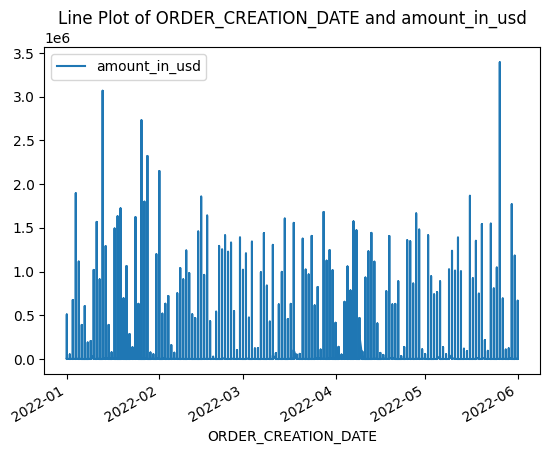

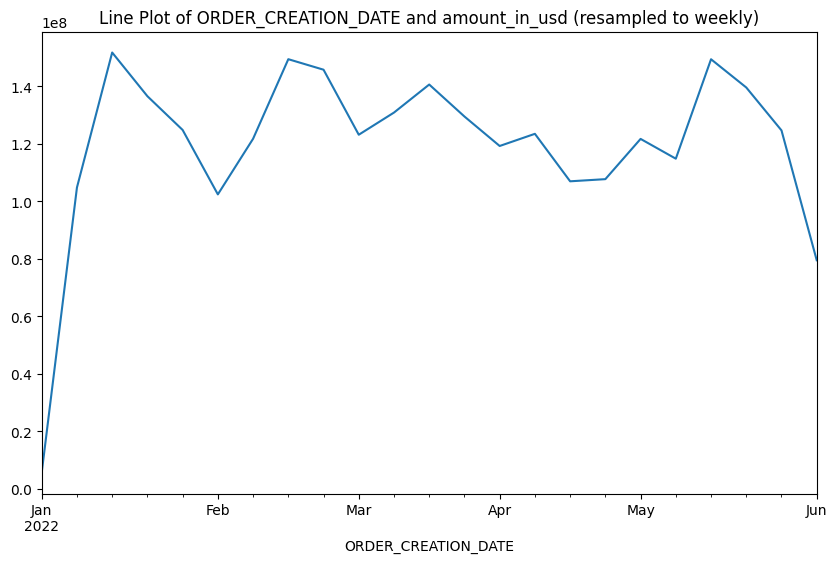

In [ ]:
# 4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd
plt.figure(figsize=(10,6))
df.plot(x='ORDER_CREATION_DATE', y='amount_in_usd')
plt.title('Line Plot of ORDER_CREATION_DATE and amount_in_usd')
plt.show()

# We can get further insights from a Line Plot of ORDER_CREATION_DATE and amount_in_usd : resampled to weekly.
plt.figure(figsize=(10,6))
df.set_index('ORDER_CREATION_DATE').resample('W')['amount_in_usd'].sum().plot()
plt.title('Line Plot of ORDER_CREATION_DATE and amount_in_usd (resampled to weekly)')
plt.show()

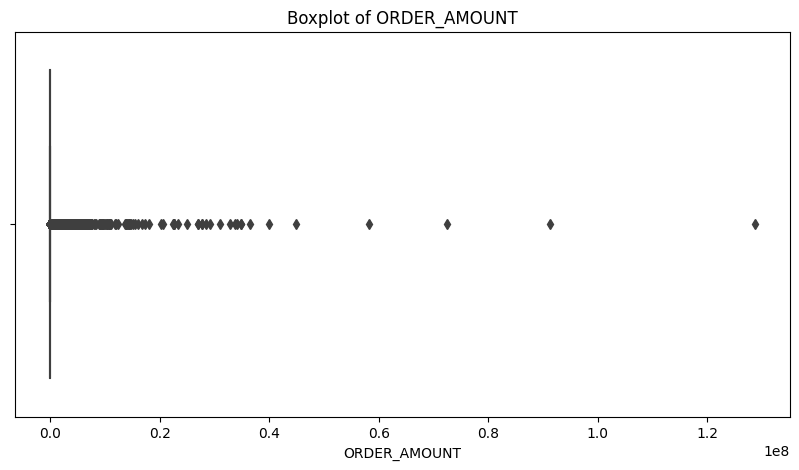

<Axes: title={'center': 'Boxplot of ORDER_AMOUNT Log transformed'}, xlabel='ORDER_AMOUNT'>

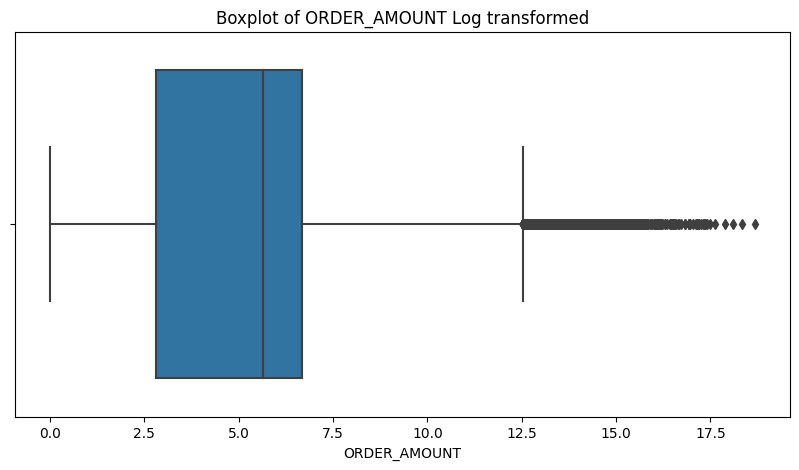

In [ ]:
# 5. Creating a boxplot on ORDER_AMOUNT to find out the outliers

df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
plt.figure(figsize=(10,5))
sns.boxplot(x=df['ORDER_AMOUNT'])
plt.title('Boxplot of ORDER_AMOUNT')
plt.show()


# To address the clutter and imbalance observed in the original box plot using the raw values, we will apply a log transformation to the order_amount values.
# This transformed data will be used to create a new box plot, resulting in a clearer and more balanced visualization.

plt.figure(figsize=(10, 5))
# Convert 'ORDER_AMOUNT' to numeric
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
plt.title('Boxplot of ORDER_AMOUNT Log transformed')

# Now you can apply the log transformation and create the boxplot
sns.boxplot(x=np.log1p(df['ORDER_AMOUNT']))

<Axes: xlabel='COMPANY_CODE'>

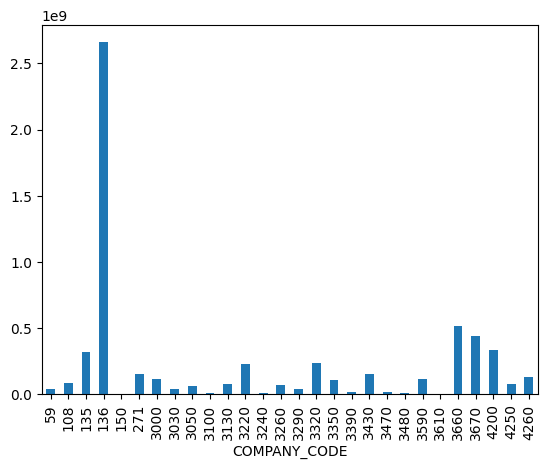

In [ ]:
# 6.Creating a  Bar Chart of COMPANY_CODE by ORDER_AMOUNT
df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum().plot(kind='bar')

# **MILESTONE 3**

In [ ]:
# Importing required libraries

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

In [ ]:
# 1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values.
# This ensures that extreme values do not affect the model's performance.
# Let's assume the appropriate value is the mean in this case

# # Convert the values in the "amount_in_usd" column to numeric format
# df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')

# # Calculating the z-scores for each value in the "amount_in_usd" column
# z_scores = np.abs(stats.zscore(df['amount_in_usd']))
# threshold = 3

# # If the z-score of each data point is greater than the threshold, the corresponding value in the "amount_in_usd" column is replaced with the mean value of the column
# df['amount_in_usd'] = np.where(z_scores > threshold, df['amount_in_usd'].mean(), df['amount_in_usd'])

import numpy as np

# calculate mean and standard deviation
mean = df['amount_in_usd'].mean()
std = df['amount_in_usd'].std()

# define a threshold for outliers
threshold = 3

# identify outliers
outliers = (np.abs(df['amount_in_usd'] - mean) > threshold * std)

# replace outliers with the mean
df.loc[outliers, 'amount_in_usd'] = mean


Changes made for final submission in step 2

In [ ]:
# 2. Label encoding or One hot Encoding on all the categorical columns
# Let's perform Label Encoding for this case. Label encoding assigns a unique numerical value to each category.

# Selecting the columns with the 'object' data type and storing their column names in the categorical_cols variable.
categorical_cols = df.select_dtypes(include=['object']).columns

# Filling any missing values in the categorical columns with a placeholder value 'Missing' to ensure all fields are filled.
df[categorical_cols] = df[categorical_cols].fillna('Missing')

#  Creating an instance of the LabelEncoder class from the scikit-learn library.
le = LabelEncoder()

# Looping in categorical_cols and converting the values in the current categorical column to strings.
# Then performing label encoding on each value.
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

Changes made for final submission in step 3

In [ ]:
# # 3. Log Transformations on continuous columns
# # This transformation is useful when the data is highly skewed or has a large range of values.
# # Taking the logarithm of the values can compress the range and make the distribution more symmetrical

# # Let's consider 'amount_in_usd' as an example

# # This line identifies the columns in the DataFrame that have numeric data types and stores their column names in the numeric_cols variable.
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# # Iterating over numeric_cols and performing the log transformation on the current numeric column.
# # Calculating the natural logarithm of each value in the column, plus 1. Plus 1 because  adding 1 is necessary to handle zero or negative values.
# # By applying the log transformation, the range of values is compressed, and the resulting column is appended to the DataFrame with a column name suffix of '_log'.
# # for col in numeric_cols:
# #     df[col + '_log'] = np.log1p(df[col])


# ## FINAL SUBMISSION CHANGES ##

# Selecting all numerical columns.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define a small constant to avoid log(0) or log(negative number)
small_constant = 1e-6

# Applying the log transformation, adding a small constant, and rounding to 6 decimal points by looping through columns.
for cols in numeric_cols:
    df[cols] = df[cols].apply(lambda x: round(np.log(x + small_constant), 6))


In [ ]:
# 4. Try to extract new features by grouping existing columns

# Creating a new feature 'total_orders', that counts the number of orders placed by each customer by grouping 'CUSTOMER_NUMBER' and counting 'CUSTOMER_ORDER_ID'.
# df['total_orders'] = df.groupby('CUSTOMER_NUMBER')['CUSTOMER_ORDER_ID'].transform('count')
# Creating new features by grouping existing columns can help capture additional information that might be relevant for the predictive power of the model.

## FINAL SUBMISSION CHANGES ##

# group by 'SALES_ORG' and 'DIVISION' columns
grouped_df = df.groupby(['SALES_ORG', 'DIVISION'])

# Calculate the average 'ORDER_AMOUNT' for each group
average_order_amount = grouped_df['ORDER_AMOUNT'].mean().reset_index().rename(columns={'ORDER_AMOUNT': 'AVERAGE_ORDER_AMOUNT'})

# Create a new feature 'TOTAL_ORDER_COUNT' by counting the number of orders in each group
total_order_count = grouped_df.size().rename('TOTAL_ORDER_COUNT')

# Merge the new features with the original dataframe
df = df.merge(average_order_amount, on=['SALES_ORG', 'DIVISION'], how='left')
df = df.merge(total_order_count, on=['SALES_ORG', 'DIVISION'], how='left')

<ipython-input-33-41053310dfda>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



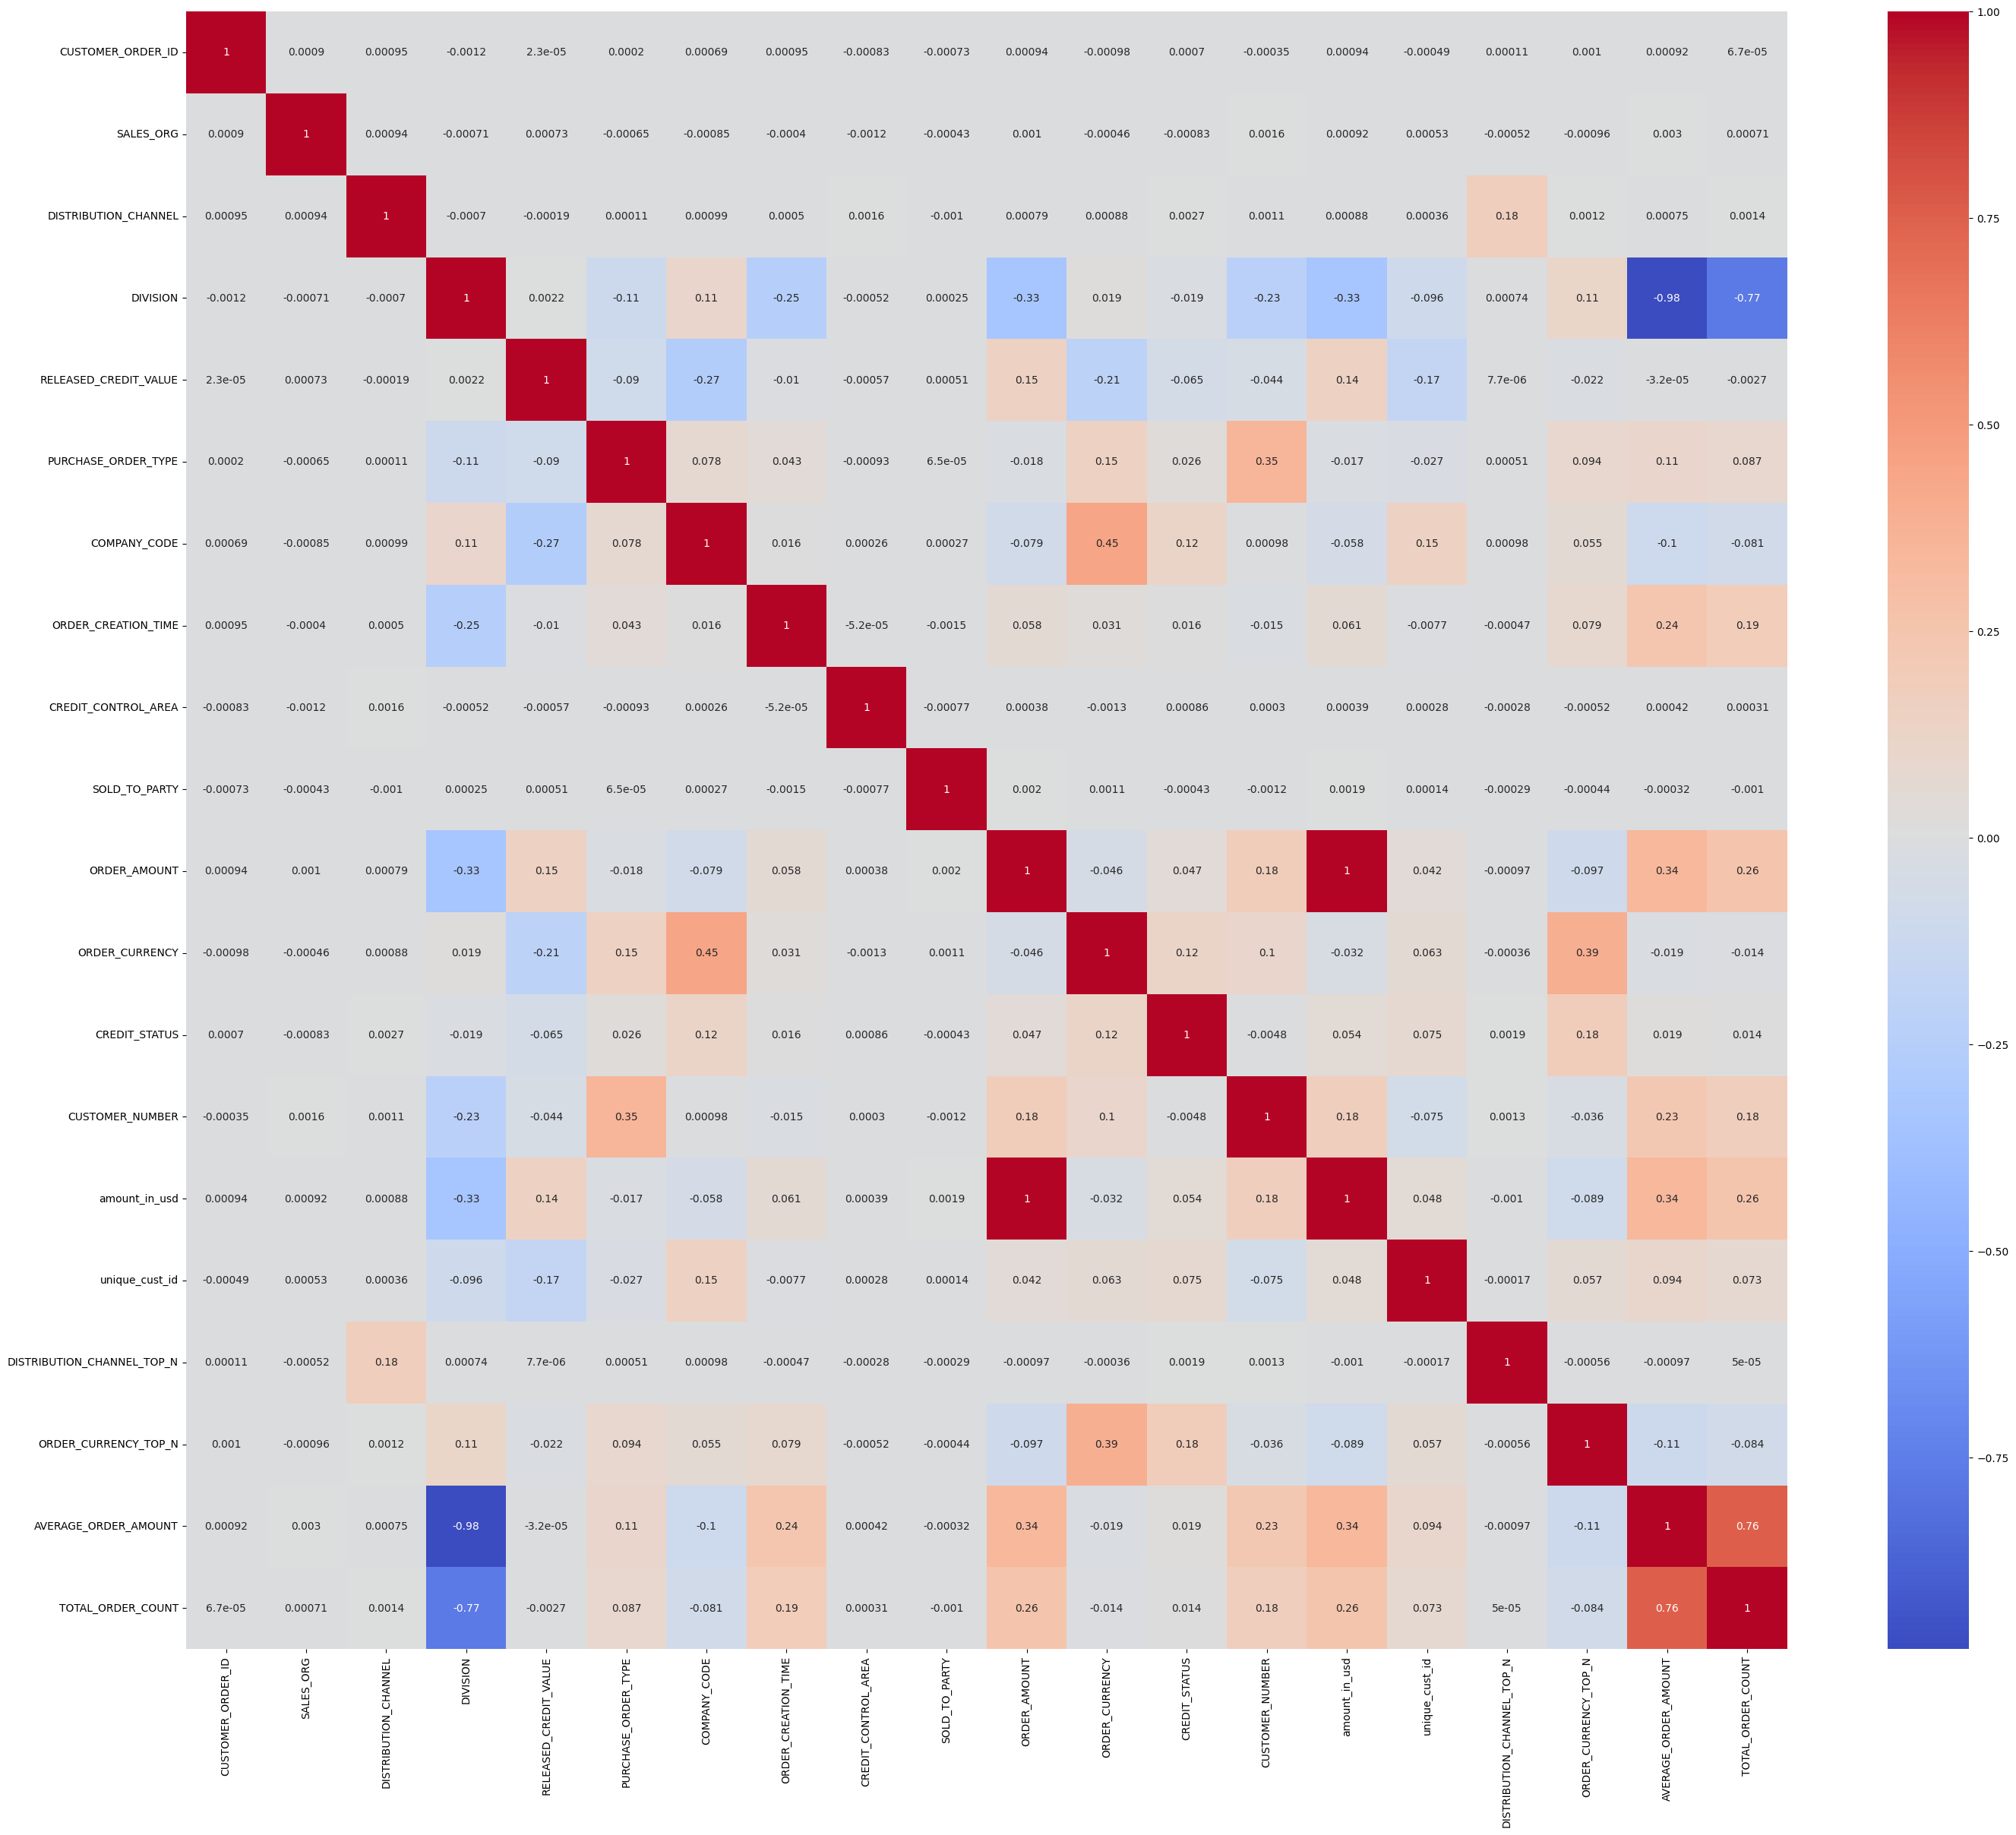

In [ ]:
# 5. Create a heatmap to find correlation between the columns

plt.figure(figsize=(34, 28))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# 6. Trying to identify important or relevant columns for feature extraction

# To identify important columns, we can focus on those that exhibit a strong correlation with the target variable
# By choosing the most informative features, we can decrease the number of dimensions, enhance the interpretability of the model, and potentially improve its performance.
# Assuming 'amount_in_usd' is the target variable in this case

# Calculateing the correlation coefficients between all numeric columns in the DataFrame and creating a correlation matrix.
correlation = df.corr(numeric_only=True)

# Identifying the important columns by filtering the correlation matrix based on the correlation with the target variable, 'amount_in_usd'.
# We will select the columns where the correlation coefficient with 'amount_in_usd' is greater than 0.3 AND will  ensure that the target variable itself is excluded from the list of important columns.
correlation_with_target = correlation.corr()['amount_in_usd'].abs().sort_values(ascending=False)

# Select the top k columns with highest correlation
k = 5  # for instance taking k = 5
top_k_columns = correlation_with_target.drop(['amount_in_usd', 'ORDER_AMOUNT']).index[:k] # Exclude the target variable itself
top_k_columns



Index(['AVERAGE_ORDER_AMOUNT', 'DIVISION', 'TOTAL_ORDER_COUNT',
       'ORDER_CURRENCY_TOP_N', 'COMPANY_CODE'],
      dtype='object')

# **MILESTONE 4**

Changes made for final submission in step 1

In [ ]:
# 1. Modify the dataset to pass into any type of machine learning models.
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = df[top_k_columns]
y = df['amount_in_usd']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The training set (X_train and y_train) will be used to train the machine learning model, while the testing set (X_test and y_test) will be used to evaluate its performance on unseen data.

# Create an imputer with a strategy (e.g., mean, median, or most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training data
X_train_imputed = imputer.transform(X_train)

In [ ]:
# 2. Try different machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# Create instances of the regression models
linear_regression = LinearRegression()
svr = SVR()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
adaboost = AdaBoostRegressor()
xgboost = xgb.XGBRegressor()

In [ ]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
adaboost.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# 3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.

# Creating a list called Models that contains instances of different regression models
Models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), xgb.XGBRegressor()]

# This loop iterates over the models in the Models list. The __class__.__name__ attribute retrieves the class name of each model instance.
for i in Models.__class__.__name__:
    print(i)

from sklearn.metrics import mean_squared_error, r2_score

# Making predictions using each trained model on the test dataset
predictions_linear = linear_regression.predict(X_test)
predictions_dt = decision_tree.predict(X_test)
predictions_rf = random_forest.predict(X_test)
predictions_adaboost = adaboost.predict(X_test)
predictions_xgboost = xgboost.predict(X_test)

# Calculates the mean squared error (MSE) for each model by comparing the predicted values with the actual target values (y_test).
mse_linear = mean_squared_error(y_test, predictions_linear)
mse_dt = mean_squared_error(y_test, predictions_dt)
mse_rf = mean_squared_error(y_test, predictions_rf)
mse_adaboost = mean_squared_error(y_test, predictions_adaboost)
mse_xgboost = mean_squared_error(y_test, predictions_xgboost)

# Calculating the root mean squared error (RMSE) for each model by taking the square root of the MSE.
rmse_linear = np.sqrt(mse_linear)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)
rmse_adaboost = np.sqrt(mse_adaboost)
rmse_xgboost = np.sqrt(mse_xgboost)

# Calculating the R-squared (coefficient of determination) for each model by comparing the predicted values with the actual target values.
r2_linear = r2_score(y_test, predictions_linear)
r2_dt = r2_score(y_test, predictions_dt)
r2_rf = r2_score(y_test, predictions_rf)
r2_adaboost = r2_score(y_test, predictions_adaboost)
r2_xgboost = r2_score(y_test, predictions_xgboost)

# Printing the results:
print("Linear Regression:")
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print("R-Squared:", r2_linear)
print()

print("Decision Tree:")
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R-Squared:", r2_dt)
print()

print("Random Forest:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-Squared:", r2_rf)
print()

print("AdaBoost:")
print("MSE:", mse_adaboost)
print("RMSE:", rmse_adaboost)
print("R-Squared:", r2_adaboost)
print()

print("XGBoost:")
print("MSE:", mse_xgboost)
print("RMSE:", rmse_xgboost)
print("R-Squared:", r2_xgboost)
print()


l
i
s
t
Linear Regression:
MSE: 61.16974383841123
RMSE: 7.821108862457499
R-Squared: 0.11874151463564808

Decision Tree:
MSE: 64.02848799358945
RMSE: 8.00178030150725
R-Squared: 0.07755624253623183

Random Forest:
MSE: 62.00107044479648
RMSE: 7.874075847030969
R-Squared: 0.10676478267611156

AdaBoost:
MSE: 60.55498475230281
RMSE: 7.781708344078619
R-Squared: 0.1275982079466258

XGBoost:
MSE: 57.734893092788006
RMSE: 7.598348050253292
R-Squared: 0.1682266223963863



In [ ]:
# 4. Compare the accuracies of all the models.

# Create a dictionary called r2_values to store the R-squared values of the regression models.
r2_values = {
    'Linear Regression': r2_linear,
    # 'Support Vector Machine': r2_svm,
    'Decision Tree': r2_dt,
    'Random Forest': r2_rf,
    'AdaBoost': r2_adaboost,
    'XGBoost': r2_xgboost
}

# Printing the R-Squared values for each model
for model, r2 in r2_values.items():
    print(model, "R-Squared:", r2)

# Finding the model with the highest R-Squared value
best_model = max(r2_values, key=r2_values.get)

# Printing the best model
print("Best Model based on R-Squared:", best_model)

Linear Regression R-Squared: 0.11874151463564808
Decision Tree R-Squared: 0.07755624253623183
Random Forest R-Squared: 0.10676478267611156
AdaBoost R-Squared: 0.1275982079466258
XGBoost R-Squared: 0.1682266223963863
Best Model based on R-Squared: XGBoost


In [ ]:
# 5. Select the best possible model.

# Create a dictionary to store the MSE values for each model
mse_values = {
    'Linear Regression': mse_linear,
    # 'Support Vector Machine': mse_svm,
    'Decision Tree': mse_dt,
    'Random Forest': mse_rf,
    'AdaBoost': mse_adaboost,
    'XGBoost': mse_xgboost
}

# Calculating the average MSE across all models
average_mse = {model: np.mean(mse_values[model]) for model in mse_values}

# Finding the model with the lowest average MSE
best_model = min(average_mse, key=average_mse.get)

# Printing the best model
print("Best Model based on MSE:", best_model)

Best Model based on MSE: XGBoost


In [ ]:
#6 Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms

from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Defining a dictionary param_grid that specifies the hyperparameters to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees to be used
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage used in update to prevents overfitting
    'max_depth': [None, 5, 10],           # Maximum depth of a tree
    'min_child_weight': [1, 5, 10],       # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0.5, 1, 1.5, 2, 5],         # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'colsample_bytree': [0.6, 0.8, 1.0]   # Subsample ratio of columns when constructing each tree
}

# Creating the model
# model = RandomForestRegressor()
model = XGBRegressor()

# Creating the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the RandomizedSearchCV object to the training data
random_search.fit(X_train[:10000], y_train[:10000])

# Getting the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)
print()

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Best Hyperparameters:
{'n_estimators': 100, 'min_child_weight': 10, 'max_depth': None, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 1.0}

Evaluation Metrics:
MSE: 59.68620256718164
RMSE: 7.725684601844787
R-Squared: 0.14011455384785954


In [ ]:
# 7. Come up with the best possible model accuracy.

# Fit the final tuned model on the training data
best_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = best_model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Evaluation Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Evaluation Metrics:
MSE: 57.57175893834935
RMSE: 7.587605612994744
R-Squared: 0.17057685878500972


# **FINAL SUBMISSION**

In [ ]:
# Due to the log-transform applied to the target column, our predicted values are now in logarithmic form.
y_pred

# Hence actual predicted values :
actual_y_pred = np.exp(y_pred)
actual_y_pred

array([5.7665764e+01, 3.3047017e-01, 3.7449390e+01, ..., 1.3223953e+02,
       3.8017828e-03, 1.1835722e+02], dtype=float32)

**CHANGES MADE IN THE OVERALL CODE FOR FINAL SUBMISSION ->**

1. ***In step 2 of milestone 3***, I created new columns to store the log-transformed values of continuous columns. However, this resulted in the creation of new columns that showed high correlation with the target variable, but they were also highly dependent on each other. To avoid this issue, I decided not to create new columns this time. Instead, I directly replaced the values in the original columns with their log-transformed values.

2. ***In step 3 of milestone 3***, I added a new feature by calculating the average order amount in each group. This new feature is called 'TOTAL_ORDER_COUNT', and it represents the number of orders in each group.

3. ***In step 1 of milestone 4***, I added a simple imputation technique to fill the null values in the dataset.

4. ***In final submission***, I converted the log-transformed values of y_pred to its actual values.

# *The model "XGBoost" has been found to be the most accurate for prediction, with the following set of hyperparameters: 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': None, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 1.0*

In [ ]:
import pickle
filename = 'model.sav'
pickle.dump(best_model, open(filename, 'wb'))